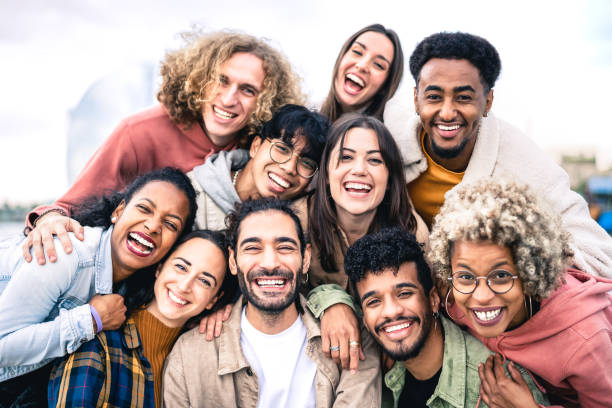

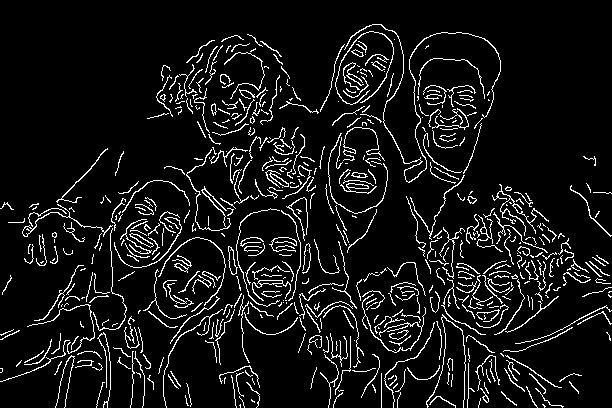

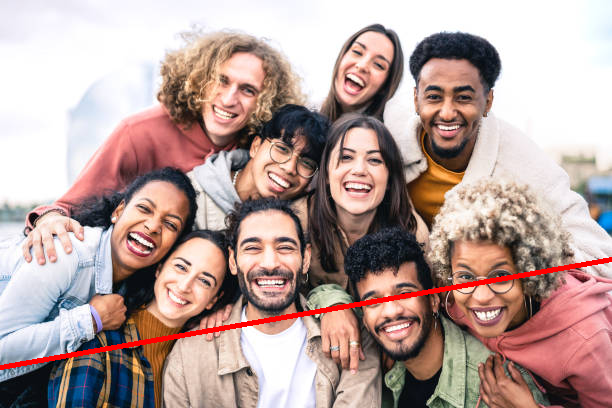

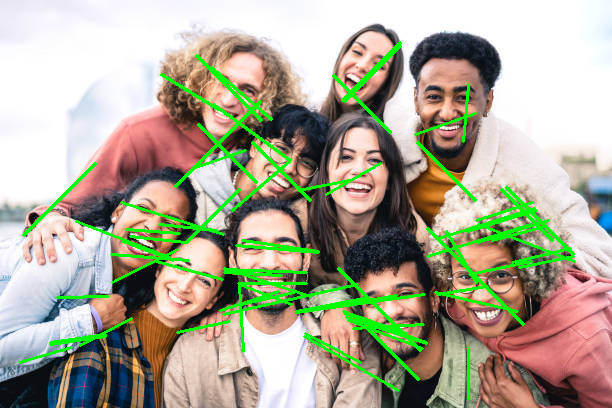

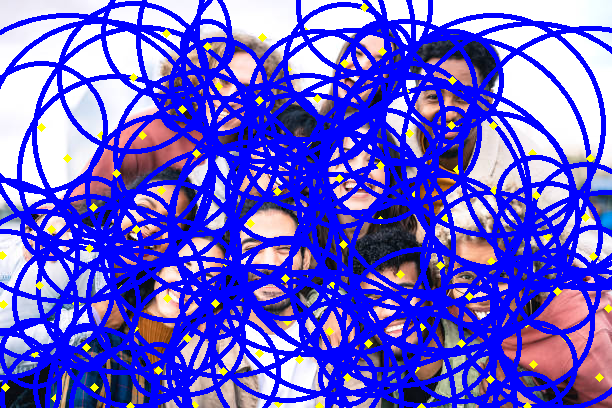

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# -------------------------------
# Load and preprocess image
# -------------------------------
img = cv2.imread("input.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (5, 5), 1.5)

# -------------------------------
# 1. Canny Edge Detection
# -------------------------------
edges = cv2.Canny(gray_blur, 100, 150)

# -------------------------------
# 2. Standard Hough Line Transform
# -------------------------------
img_standard = img.copy()
lines = cv2.HoughLines(edges, 1, np.pi/180, 120)

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img_standard, (x1, y1), (x2, y2), (0, 0, 255), 2)

# -------------------------------
# 3. Probabilistic Hough Line Transform
# -------------------------------
img_prob = img.copy()
linesP = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=80,
                         minLineLength=50, maxLineGap=10)

if linesP is not None:
    for x1, y1, x2, y2 in linesP[:, 0]:
        cv2.line(img_prob, (x1, y1), (x2, y2), (0, 255, 0), 2)

# -------------------------------
# 4. Hough Circle Detection
# -------------------------------
img_circles = img.copy()
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, dp=1.2,
                           minDist=40, param1=100, param2=30,
                           minRadius=10, maxRadius=150)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for x, y, r in circles[0]:
        cv2.circle(img_circles, (x, y), r, (255, 0, 0), 3)
        cv2.circle(img_circles, (x, y), 2, (0, 255, 255), 3)

# -------------------------------
# Display All Results
# -------------------------------
cv2_imshow(img)
cv2_imshow(edges)
cv2_imshow(img_standard)
cv2_imshow(img_prob)
cv2_imshow(img_circles)

cv2.waitKey(0)
cv2.destroyAllWindows()